In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('airbnb_listings.csv')

In [194]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [196]:
df.isnull().sum().sum()

70112

In [197]:
# Data Cleaning: Handling missing values for review_scores_rating

# Masks for numerical and non-numerical columns
num_mask = df.select_dtypes(include=['int64', 'float64']).columns
non_num_mask = df.select_dtypes(include=['object']).columns

mean_values = df[num_mask].mean()

# Fill missing values in numerical columns with the mean value
df[num_mask] = df[num_mask].fillna(mean_values)

# Fill missing values in non-numerical columns with the string "NaN"
df[non_num_mask] = df[non_num_mask].fillna("NaN")


In [198]:
def str_to_num (string):
    if string is not None:
        if type(string) is str and string.startswith('$'):
            return float(string.replace('$', '').replace(',', ''))
        else:
            return None
    else:
        return None

In [199]:
df = pd.concat([df.drop('price', axis=1), df["price"].apply(str_to_num)], axis=1)
df['price'].head()

0     70.0
1     67.0
2     45.0
3     80.0
4    251.0
Name: price, dtype: float64

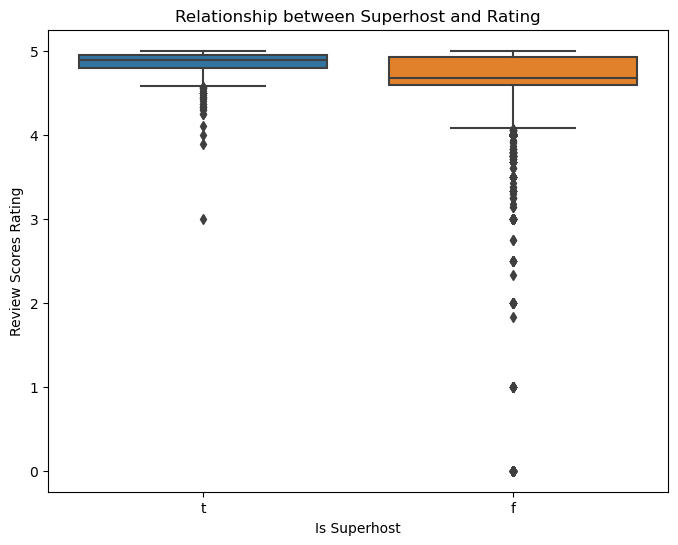

In [200]:
# Trend: 'Relationship between Superhost and Rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df)
plt.title('Relationship between Superhost and Rating')
plt.xlabel('Is Superhost')
plt.ylabel('Review Scores Rating')
plt.show()

In [201]:
# Statistical Analysis
superhost_mean = df[df['host_is_superhost'] == 't']['review_scores_rating'].mean()
non_superhost_mean = df[df['host_is_superhost'] == 'f']['review_scores_rating'].mean()

superhost_median = df[df['host_is_superhost'] == 't']['review_scores_rating'].median()
non_superhost_median = df[df['host_is_superhost'] == 'f']['review_scores_rating'].median()

superhost_iqr = df[df['host_is_superhost'] == 't']['review_scores_rating'].quantile(0.75) - df[df['host_is_superhost'] == 't']['review_scores_rating'].quantile(0.25)
non_superhost_iqr = df[df['host_is_superhost'] == 'f']['review_scores_rating'].quantile(0.75) - df[df['host_is_superhost'] == 'f']['review_scores_rating'].quantile(0.25)

superhost_std = df[df['host_is_superhost'] == 't']['review_scores_rating'].std()
non_superhost_std = df[df['host_is_superhost'] == 'f']['review_scores_rating'].std()

print(f'Mean Rating for Superhosts: {superhost_mean:.2f}')
print(f'Mean Rating for Non-Superhosts: {non_superhost_mean:.2f}')

print(f'Median Rating for Superhosts: {superhost_median:.2f}')
print(f'Median Rating for Non-Superhosts: {non_superhost_median:.2f}')

print(f'IQR for Rating of Superhosts: {superhost_iqr:.2f}')
print(f'IQR for Rating of Non-Superhosts: {non_superhost_iqr:.2f}')

print(f'Standard Deviation of Rating for Superhosts: {superhost_std:.2f}')
print(f'Standard Deviation of Rating for Non-Superhosts: {non_superhost_std:.2f}')


Mean Rating for Superhosts: 4.85
Mean Rating for Non-Superhosts: 4.57
Median Rating for Superhosts: 4.89
Median Rating for Non-Superhosts: 4.67
IQR for Rating of Superhosts: 0.15
IQR for Rating of Non-Superhosts: 0.34
Standard Deviation of Rating for Superhosts: 0.15
Standard Deviation of Rating for Non-Superhosts: 0.74


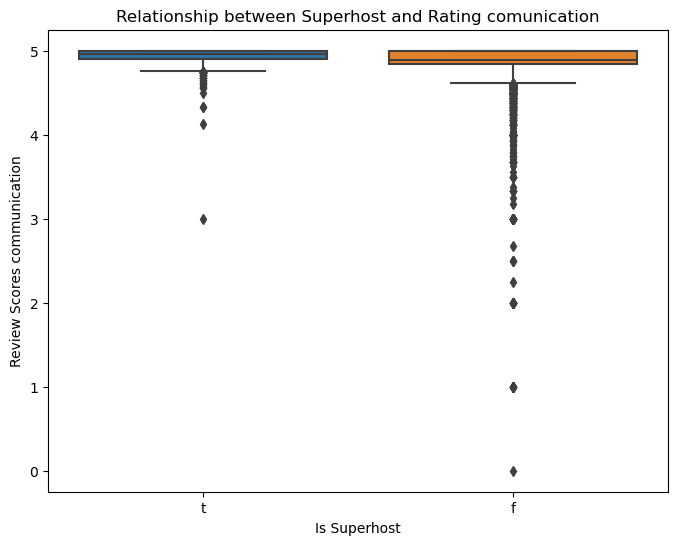

In [202]:

# Trend: 'Relationship between Superhost and Rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_communication', data=df)
plt.title('Relationship between Superhost and Rating comunication')
plt.xlabel('Is Superhost')
plt.ylabel('Review Scores communication')
plt.show()

In [203]:
# Statistical Analysis
mean = df[df['host_is_superhost'] == 't']['review_scores_communication'].mean()
non_mean = df[df['host_is_superhost'] == 'f']['review_scores_communication'].mean()

median = df[df['host_is_superhost'] == 't']['review_scores_communication'].median()
non_median = df[df['host_is_superhost'] == 'f']['review_scores_communication'].median()

iqr = df[df['host_is_superhost'] == 't']['review_scores_communication'].quantile(0.75) - df[df['host_is_superhost'] == 't']['review_scores_communication'].quantile(0.25)
non_iqr = df[df['host_is_superhost'] == 'f']['review_scores_communication'].quantile(0.75) - df[df['host_is_superhost'] == 'f']['review_scores_communication'].quantile(0.25)

std = df[df['host_is_superhost'] == 't']['review_scores_communication'].std()
non_std = df[df['host_is_superhost'] == 'f']['review_scores_communication'].std()

print(f'Mean Rating for Superhosts: {mean:.2f}')
print(f'Mean Rating for review scores communication: {non_mean:.2f}')

print(f'Median Rating for Superhosts: {median:.2f}')
print(f'Median Rating for review scores communication: {non_median:.2f}')

print(f'IQR for Rating of Superhosts: {iqr:.2f}')
print(f'IQR for Rating of review scores communication: {non_iqr:.2f}')

print(f'Standard Deviation of Superhosts: {std:.2f}')
print(f'Standard Deviation of review scores communication: {non_std:.2f}')

Mean Rating for Superhosts: 4.93
Mean Rating for review scores communication: 4.83
Median Rating for Superhosts: 4.96
Median Rating for review scores communication: 4.89
IQR for Rating of Superhosts: 0.10
IQR for Rating of review scores communication: 0.16
Standard Deviation of Superhosts: 0.11
Standard Deviation of review scores communication: 0.32


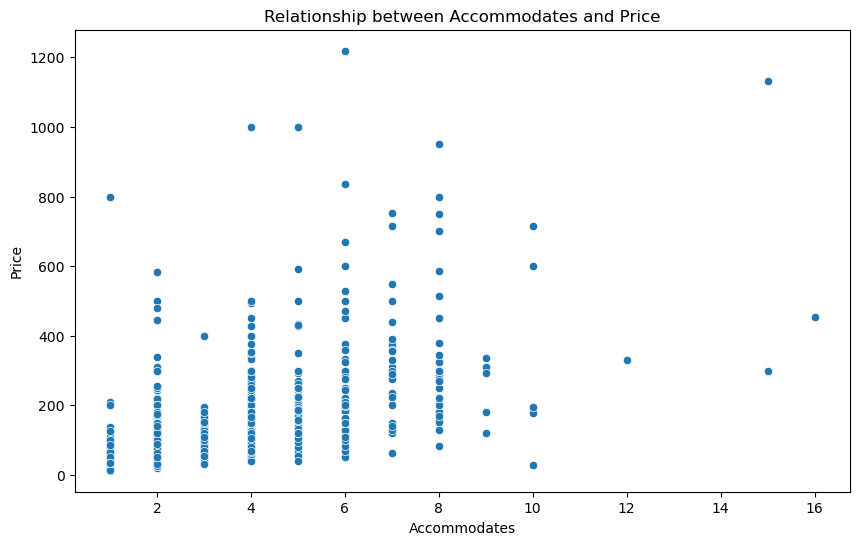

In [216]:
# Trend: Relationship between Accommodates and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y=df['price'].iloc[1:1000], data=df)
plt.title('Relationship between Accommodates and Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

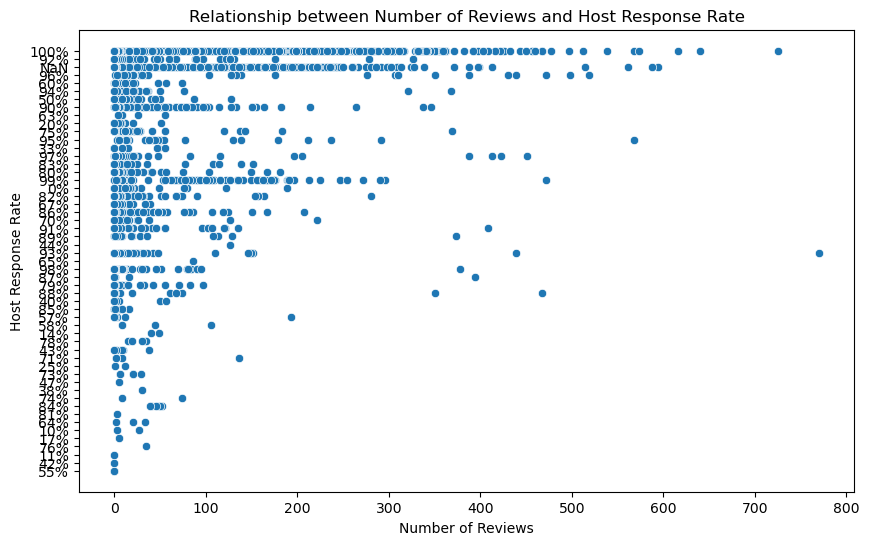

In [206]:
# Trend: Relationship between the Number of Reviews and the Host Response Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='host_response_rate', data=df)
plt.title('Relationship between Number of Reviews and Host Response Rate')
plt.xlabel('Number of Reviews')
plt.ylabel('Host Response Rate')
plt.show()

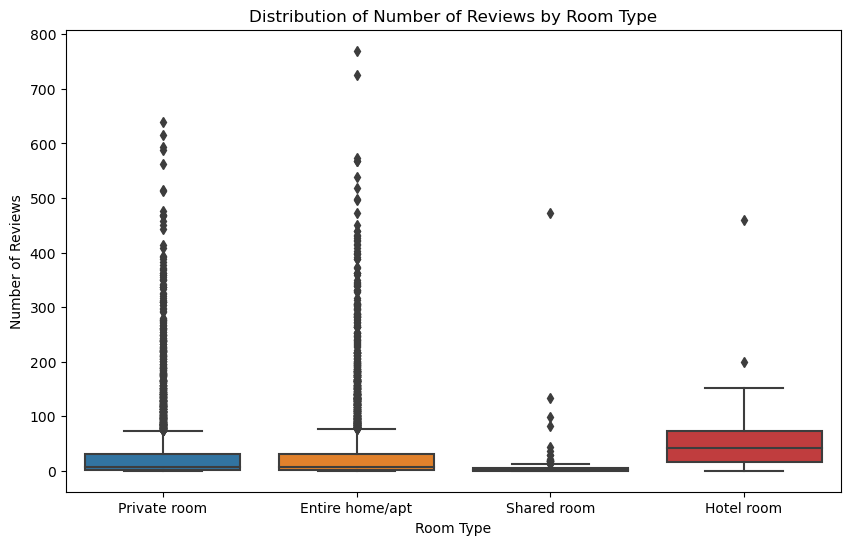

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='number_of_reviews', data=df)
plt.title('Distribution of Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()

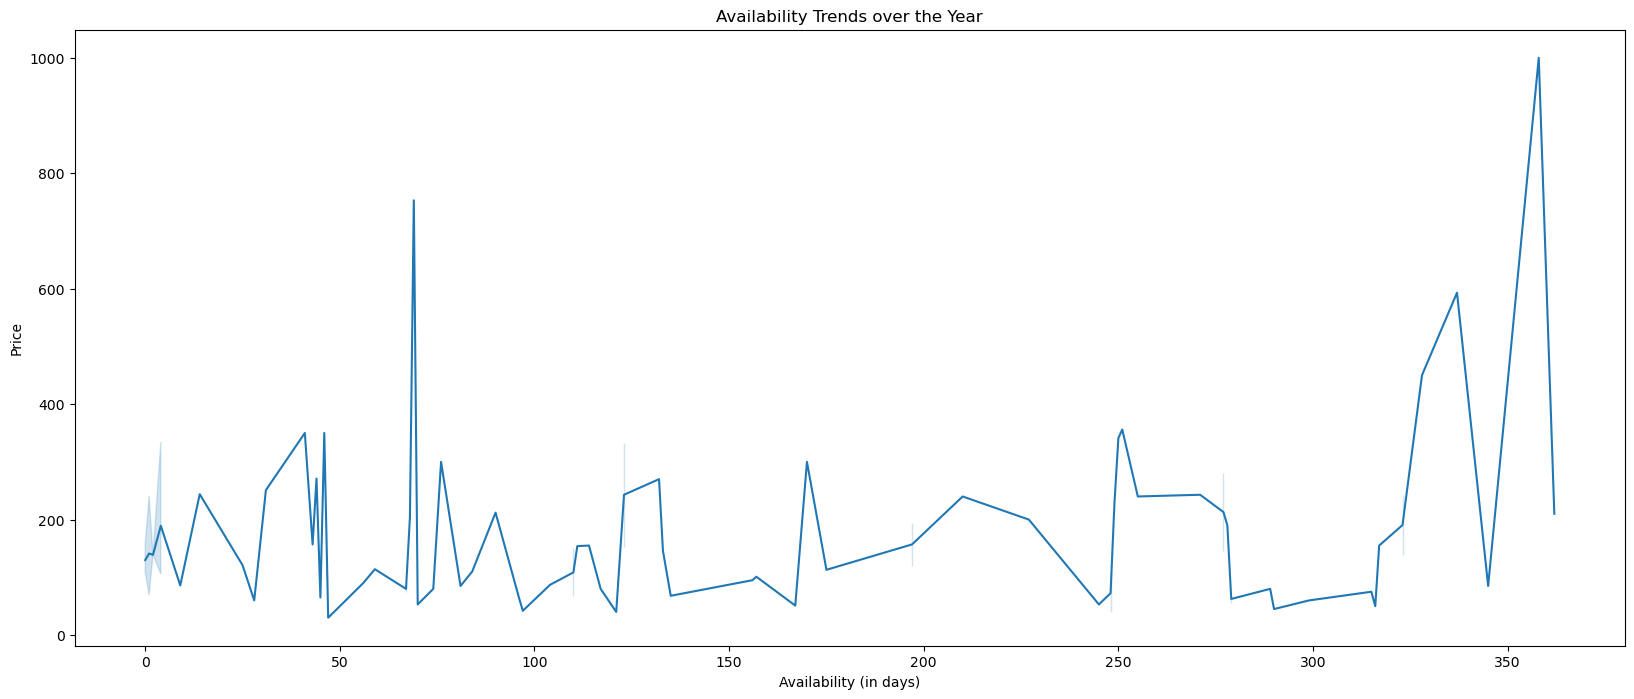

In [208]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='availability_365', y=df['price'].iloc[1:150], data=df)
plt.title('Availability Trends over the Year')
plt.xlabel('Availability (in days)')
plt.ylabel('Price')
plt.show()